In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

from citipy import citipy
from pprint import pprint
from datetime import datetime

#Import API KEY
#in git bash: export ow_key="keyvalue"
ow_key = os.environ["ow_key"]

output = "Output_Data/City_Data.csv"

ow_key

'8a30b773a64e38aa40ed0500f2c5f760'

In [3]:
#randomly select latitudes and longitudes

#use random.uniform to set a min & max random value for latitude and longitude
#change the arrays to lists so the for loop works
lat_list = np.random.uniform(low=-90.000, high=90.000, size=1500).tolist()
lng_list = np.random.uniform(low=-180.000, high=180.000, size=1500).tolist()
city_list = []

#for loop and get unique cities based on lat/lng
#append unique cities to city list
for x in range(len(lat_list)):
    city = citipy.nearest_city(lat_list[x], lng_list[x]).city_name
    if str.title(city) not in city_list:
        city_list.append(str.title(city))

#make dataframe with city list
cities_df = pd.DataFrame({"City Name":city_list})

len(city_list)

592

In [4]:
#create base url to use in requests

url = "http://api.openweathermap.org/data/2.5/weather?q="

#create empty lists for responses
#datetime not included because it's not needed in the dataframe
#the date is calculated below from the last response call
city_name = []
country = []
clouds = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []


#use a for loop to get data
#try/except to get around repeated KeyError
#get the temp/wind speed in imperial units so Americans can understand
for x in range(len(city_list)):
    print(f"Requesting weather data for {city_list[x]}")
    response = requests.get(f"{url}{city_list[x]}&units=imperial&appid={ow_key}").json()
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
    except: KeyError

Requesting weather data for Luba
Requesting weather data for Tocopilla
Requesting weather data for Ketchikan
Requesting weather data for Wexford
Requesting weather data for Sorland
Requesting weather data for Hobart
Requesting weather data for Cayhagan
Requesting weather data for Jamestown
Requesting weather data for Nola
Requesting weather data for Cape Town
Requesting weather data for Dalmeny
Requesting weather data for Bluff
Requesting weather data for Nizhneyansk
Requesting weather data for Elat
Requesting weather data for Albany
Requesting weather data for Rikitea
Requesting weather data for Ribeira Grande
Requesting weather data for Mataura
Requesting weather data for Alihe
Requesting weather data for Ushuaia
Requesting weather data for Dien Bien
Requesting weather data for Pisco
Requesting weather data for Nhulunbuy
Requesting weather data for Grand River South East
Requesting weather data for Hasaki
Requesting weather data for Taolanaro
Requesting weather data for Yarmouth
Requ

Requesting weather data for Mingaora
Requesting weather data for Biak
Requesting weather data for Port Alfred
Requesting weather data for Balingen
Requesting weather data for Pemangkat
Requesting weather data for Guerrero Negro
Requesting weather data for Calvinia
Requesting weather data for Salalah
Requesting weather data for Labrea
Requesting weather data for Lebu
Requesting weather data for Tubruq
Requesting weather data for Karsiyang
Requesting weather data for Umzimvubu
Requesting weather data for Eyl
Requesting weather data for Yinchuan
Requesting weather data for Safakulevo
Requesting weather data for Provideniya
Requesting weather data for Ossora
Requesting weather data for Ninghai
Requesting weather data for Buy
Requesting weather data for Taburi
Requesting weather data for Ceyhan
Requesting weather data for Lazaro Cardenas
Requesting weather data for Touros
Requesting weather data for Panaba
Requesting weather data for Kodiak
Requesting weather data for Olafsvik
Requesting we

Requesting weather data for Banjarmasin
Requesting weather data for Kloulklubed
Requesting weather data for Minna
Requesting weather data for Celestun
Requesting weather data for Sumter
Requesting weather data for Shestakovo
Requesting weather data for Fairbanks
Requesting weather data for Obo
Requesting weather data for La Romana
Requesting weather data for Vanimo
Requesting weather data for Axim
Requesting weather data for Fort Nelson
Requesting weather data for Zaria
Requesting weather data for Klaksvik
Requesting weather data for Mago
Requesting weather data for Quelimane
Requesting weather data for Shigony
Requesting weather data for Filadelfia
Requesting weather data for Aporawan
Requesting weather data for Sakhipur
Requesting weather data for Xining
Requesting weather data for Ostrovnoy
Requesting weather data for Cascais
Requesting weather data for Carutapera
Requesting weather data for Pedernales
Requesting weather data for Yerbogachen
Requesting weather data for Sinkat
Reques

In [5]:
len(country)

538

In [6]:
#make the dataframe

data = {"City":city_name,
        "Country":country,
        "Cloudiness":clouds,
        "Humidity":humidity,
        "Max Temp.":max_temp,
        "Wind Speed":wind_speed,
        "Latitude":lat,
        "Longitude":lng}

df = pd.DataFrame(data)

df.to_csv("Output_Data/Random_Results.csv")

df.head()

,City,Country,Cloudiness,Humidity,Max Temp.,Wind Speed,Latitude,Longitude
0,Luba,PH,0,56,82.67,2.68,17.32,120.70
1,Tocopilla,CL,73,82,58.01,5.17,-22.09,-70.20
2,Ketchikan,US,75,93,59.00,16.11,55.34,-131.65
3,Wexford,US,1,73,73.99,3.36,40.63,-80.06
4,Sorland,NO,42,61,45.59,13.56,67.67,12.69


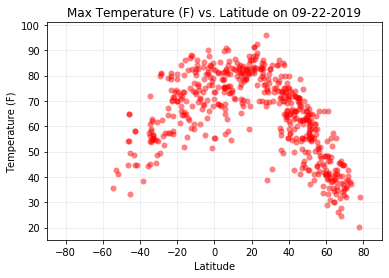

In [14]:
#Temperature (F) vs. Latitude

#find the date
date = datetime.utcfromtimestamp(response["dt"]).strftime('%m-%d-%Y')

#create plot - set alpha to .5 to create transparency so clusters are more obvious
plot_1 = plt.scatter(df["Latitude"],df["Max Temp."], linewidth=0, marker="o", color="red", alpha=.5)

plt.title(f"Max Temperature (F) vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.xlim(-90, 90)
plt.ylim(df["Max Temp."].min()-5, df["Max Temp."].max()+5)

plt.grid(alpha=.25)

plt.savefig("Output_Data/Temperature.png")


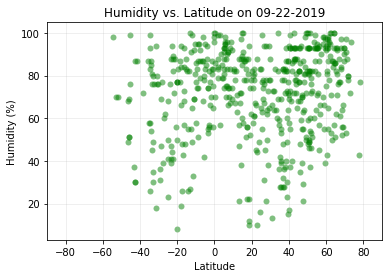

In [15]:
#Humidity (%) vs. Latitude

#remove outlier with >100% humidity
df = df[df.Humidity < 101]

plot_2 = plt.scatter(df["Latitude"],df["Humidity"], linewidth=0, marker="o", color="green", alpha=.5)

plt.title(f"Humidity vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-90, 90)
plt.ylim(df["Humidity"].min()-5, df["Humidity"].max()+5)

plt.grid(alpha=.25)

plt.savefig("Output_Data/Humidity.png")


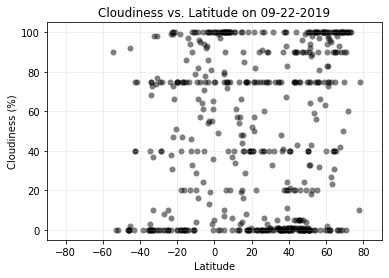

In [16]:
#Cloudiness (%) vs. Latitude

plot_3 = plt.scatter(df["Latitude"],df["Cloudiness"], linewidth=0, marker="o", color="black", alpha=.5)

plt.title(f"Cloudiness vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-90, 90)
plt.ylim(df["Cloudiness"].min()-5, df["Cloudiness"].max()+5)

plt.grid(alpha=.25)

plt.savefig("Output_Data/Cloudiness.png")

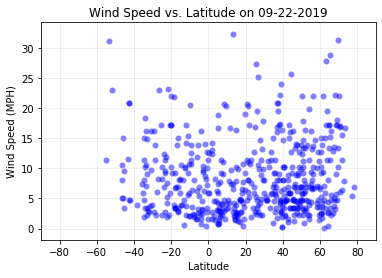

In [18]:
#Wind Speed (mph) vs. Latitude

plot_3 = plt.scatter(df["Latitude"],df["Wind Speed"], linewidth=0, marker="o", color="blue", alpha=.5)

plt.title(f"Wind Speed vs. Latitude on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.xlim(-90, 90)
plt.ylim(df["Wind Speed"].min()-2, df["Wind Speed"].max()+2)

plt.grid(alpha=.25)

plt.savefig("Output_Data/Wind_Speed.png")